In [4]:
import pandas as pd
# the bare minimum
import matplotlib.pyplot as plt
import geopandas as gpd

# more advanced
import pyogrio as ogr
from sklearn.cluster import KMeans
from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_categorical_cmap, apply_continuous_cmap
from palettable.colorbrewer.sequential import PuRd_9
from matplotlib.colors import LogNorm

import pydeck as pdk

In [5]:
# pluto = gpd.read_file("C:\Users\daiyu\Documents\GitHub\cdp-mapping-systems\Data\nyc_mappluto_24v1_1_shp\MapPLUTO.shp.xml")
pluto_ogrio = ogr.read_dataframe(r"C:\Users\daiyu\Documents\GitHub\cdp-mapping-systems\Data\nyc_mappluto_24v1_1_shp\MapPLUTO.shp")

In [7]:
file_path = r"C:\Users\daiyu\Documents\GitHub\colloquium_summer24\price_trend\zip_10025_location.csv"
df = pd.read_csv(file_path)
print(df)

   Boro-Block-Lot Condo Section                Address  Borough  Postcode  \
0    1-01206-7501       1257-R1  327 CENTRAL PARK WEST        1   10025.0   
1    1-01209-7501       0839-R1  353 CENTRAL PARK WEST        1   10025.0   
2    1-01223-7501       0357-R1   661 AMSTERDAM AVENUE        1   10025.0   
3    1-01223-7502       0550-R1     124 WEST 93 STREET        1   10025.0   
4    1-01223-7503       1645-R1     100 WEST 93 STREET        1   10025.0   
..            ...           ...                    ...      ...       ...   
60   1-01891-7502       2054-R1    905 WEST END AVENUE        1   10025.0   
61   1-01893-7501       0831-R1    301 WEST 108 STREET        1   10025.0   
62   1-01893-7502       1917-R1  610 CATHEDRAL PARKWAY        1   10025.0   
63   1-01894-7501       0497-R1          2849 BROADWAY        1   10025.0   
64   1-01896-7501       0202-R1          2931 BROADWAY        1   10025.0   

     Latitude  Longitude  Community Board  Council District  Census Tract  

In [8]:
condo_df = pd.read_csv(file_path)

In [9]:
condo_df = gpd.GeoDataFrame(condo_df, geometry=gpd.points_from_xy(condo_df.Longitude, condo_df.Latitude))

NYC Map CRS: EPSG:2263
Condo CRS: EPSG:4326


Text(56.972222222222214, 0.5, 'Latitude ')

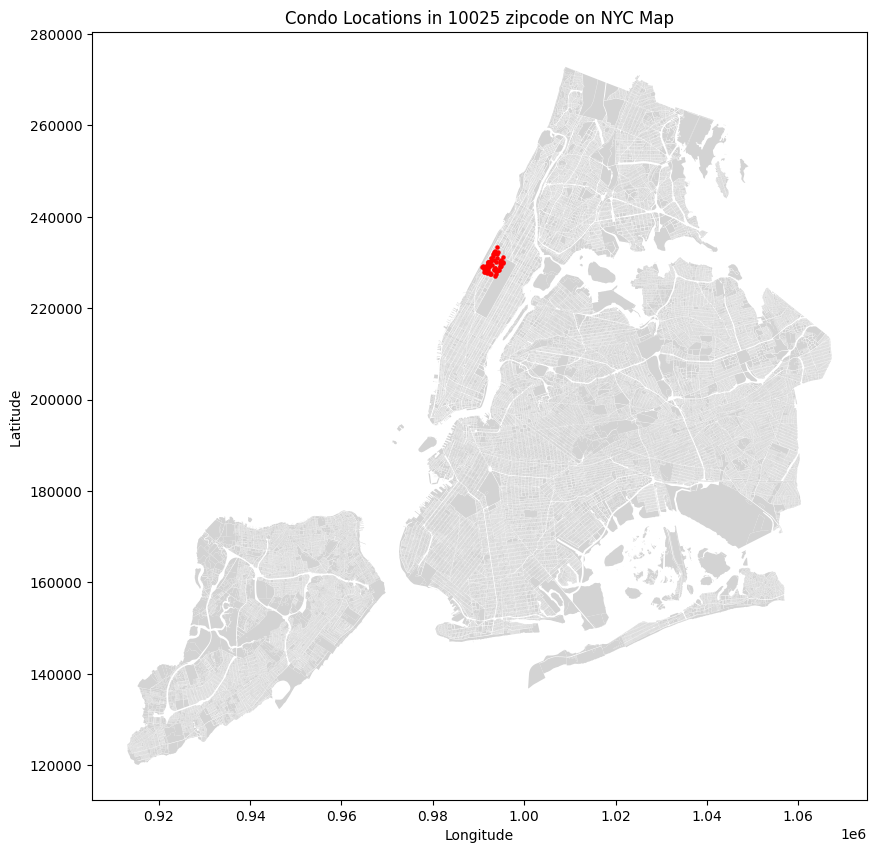

In [10]:
# Assuming nyc_map and condo_df are your GeoDataFrames
# Set a CRS if it's not already set
if pluto_ogrio.crs is None:
    pluto_ogrio.set_crs("EPSG:4326", inplace=True)  # Assuming WGS 84 for example
if condo_df.crs is None:
    condo_df.set_crs("EPSG:4326", inplace=True)  # Assuming WGS 84 for example

# Check CRS of both datasets
print(f"NYC Map CRS: {pluto_ogrio.crs}")
print(f"Condo CRS: {condo_df.crs}")

# If they don't match, transform condo_df to match nyc_map CRS
if pluto_ogrio.crs != condo_df.crs:
    condo_df = condo_df.to_crs(pluto_ogrio.crs)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot NYC map
pluto_ogrio.plot(ax=ax, color='lightgrey')

# Plot condo locations
condo_df.plot(ax=ax, color='red', markersize=5)

# Add title and labels
plt.title('Condo Locations in 10025 zipcode on NYC Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude ')

NYC Map CRS: EPSG:2263
Condo CRS: EPSG:2263


C:\Users\daiyu\AppData\Local\Temp\ipykernel_10892\2376460994.py:23: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  condo_10025_df.to_file("condo_10025.shp", driver='ESRI Shapefile')


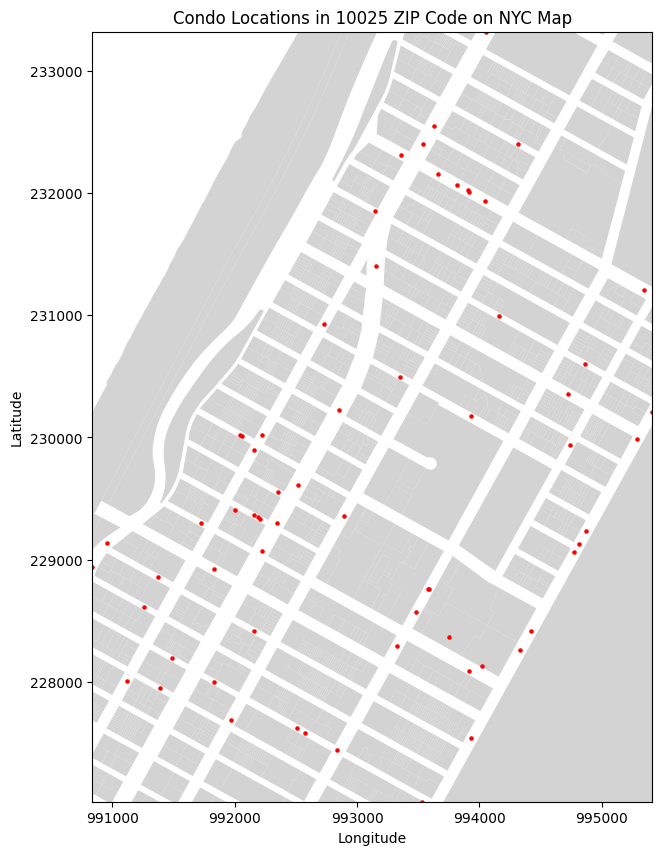

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming nyc_map and condo_df are your GeoDataFrames
# Set a CRS if it's not already set
if pluto_ogrio.crs is None:
    pluto_ogrio.set_crs("EPSG:4326", inplace=True)  # Assuming WGS 84 for example
if condo_df.crs is None:
    condo_df.set_crs("EPSG:4326", inplace=True)  # Assuming WGS 84 for example

# Check CRS of both datasets
print(f"NYC Map CRS: {pluto_ogrio.crs}")
print(f"Condo CRS: {condo_df.crs}")

# If they don't match, transform condo_df to match nyc_map CRS
if pluto_ogrio.crs != condo_df.crs:
    condo_df = condo_df.to_crs(pluto_ogrio.crs)

# Filter condo_df for the 10025 ZIP code
condo_10025_df = condo_df[condo_df['Postcode'] == 10025]

# Export the filtered GeoDataFrame to a shapefile
condo_10025_df.to_file("condo_10025.shp", driver='ESRI Shapefile')

# Get the bounding box of the filtered condo locations
xmin, ymin, xmax, ymax = condo_10025_df.total_bounds

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot NYC map
pluto_ogrio.plot(ax=ax, color='lightgrey')

# Plot condo locations
condo_10025_df.plot(ax=ax, color='red', markersize=5)

# Set the extent to zoom into the area of interest
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Add title and labels
plt.title('Condo Locations in 10025 ZIP Code on NYC Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()
